# Prediction of Crop Production Using XGBoost

### Loading and Study the Data

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load the dataset

data = pd.read_csv(r'E:\Python for Data Science and Machine Learning\Python Projects and Assignments\Crop Production data.csv')
pd.set_option('display.max_columns', None)
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [3]:
# Get the column names of the dataframe

data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [4]:
# Looking at basic information about the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


### Data Cleaning and Preprocessing

In [5]:
# Checking for missing values

data.isnull().mean() * 100

State_Name       0.000000
District_Name    0.000000
Crop_Year        0.000000
Season           0.000000
Crop             0.000000
Area             0.000000
Production       1.515699
dtype: float64

In [6]:
# Handling missing values
# For simplicity, we'll drop rows with missing target values and fill others with median/mode

data = data.dropna(subset=['Production'])  # Replace 'Production' with actual dependent variable if different
data = data.fillna(data.median())

C:\Users\Henry\AppData\Local\Temp\ipykernel_6856\2191332376.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.median())


In [7]:
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB


### Exploratory Data Analysis (EDA)

In [9]:
# Get summary statistics for the dataset

data.describe()

,Crop_Year,Area,Production
count,242361.000000,2.423610e+05,2.423610e+05
mean,2005.625773,1.216741e+04,5.825034e+05
std,4.958285,5.085744e+04,1.706581e+07
min,1997.000000,1.000000e-01,0.000000e+00
25%,2002.000000,8.700000e+01,8.800000e+01
50%,2006.000000,6.030000e+02,7.290000e+02
75%,2010.000000,4.545000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


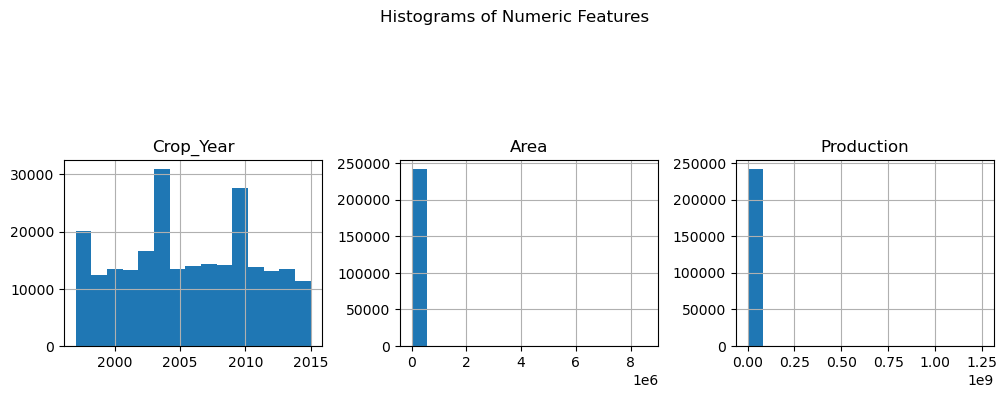

In [10]:
# Plot histograms for numeric features

numeric_features = data.select_dtypes(include=[np.number]).columns
data[numeric_features].hist(bins=15, figsize=(12, 15), layout=(5, 3))
plt.suptitle('Histograms of Numeric Features')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

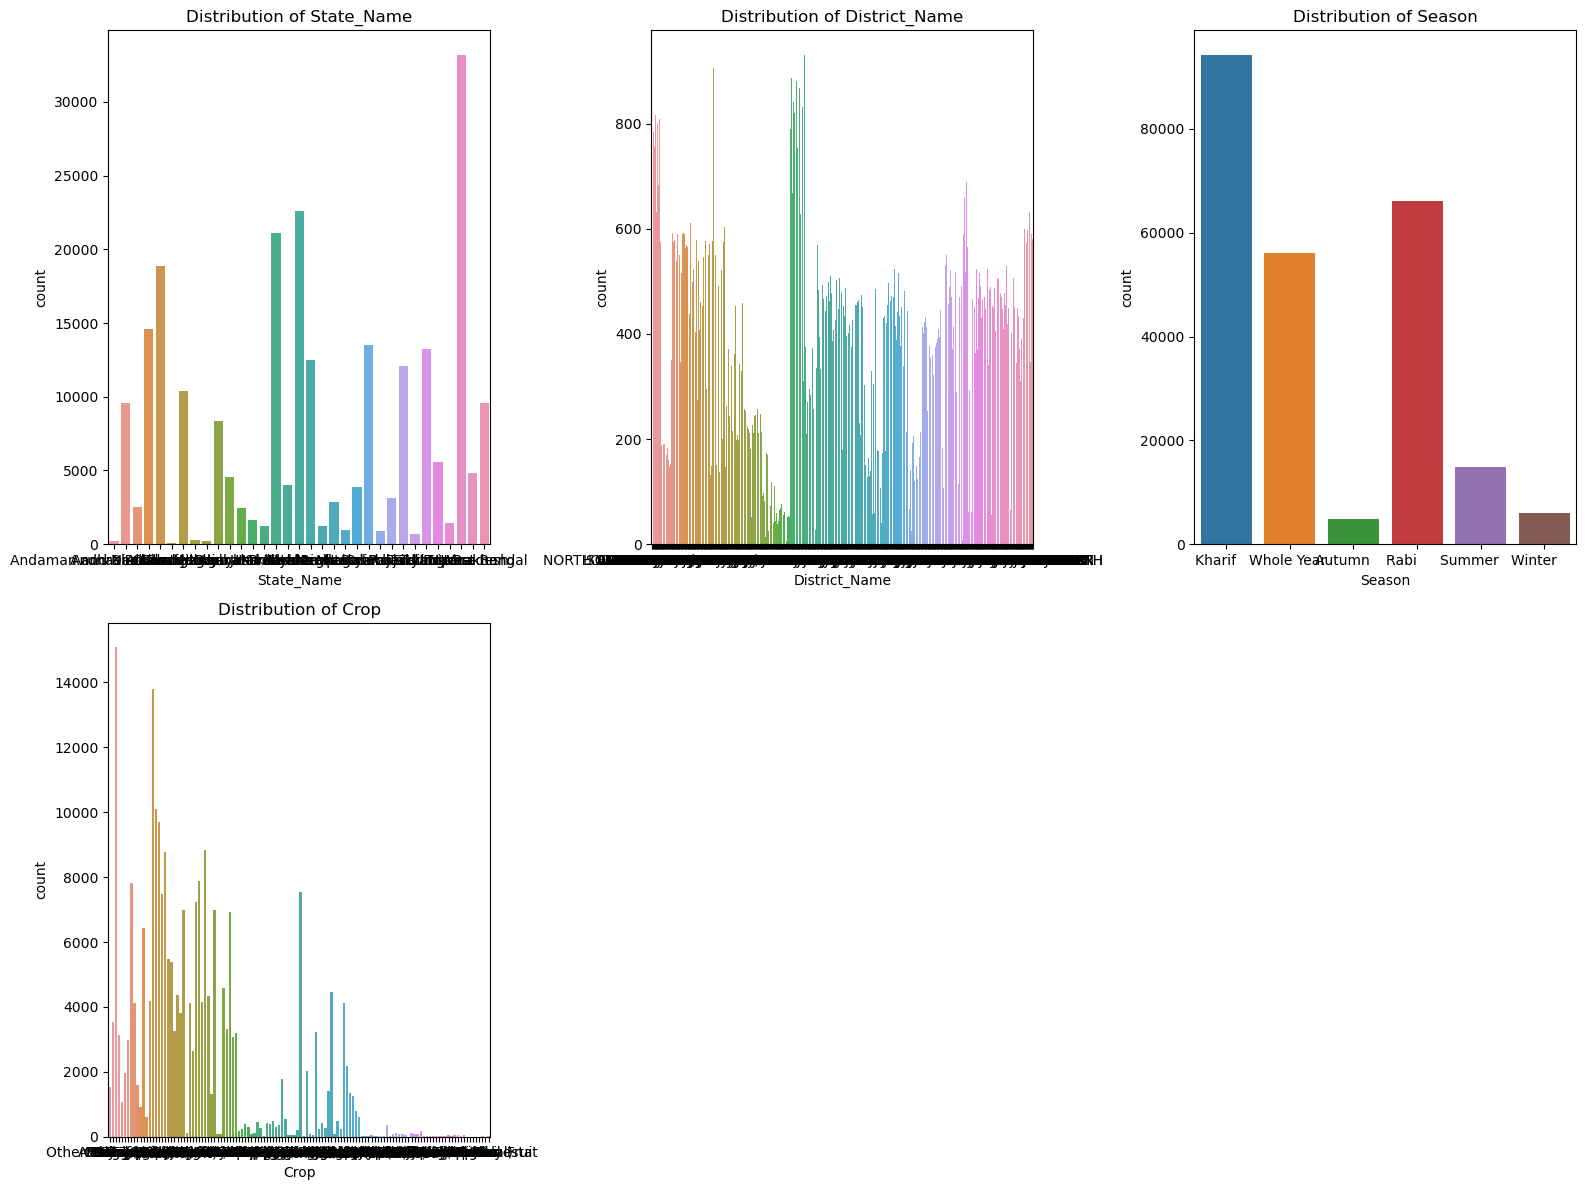

In [11]:
# Plot bar plots for categorical features

categorical_features = data.select_dtypes(include=[object]).columns

plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(len(categorical_features)//3 + 1, 3, i)
    sns.countplot(data[feature])
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

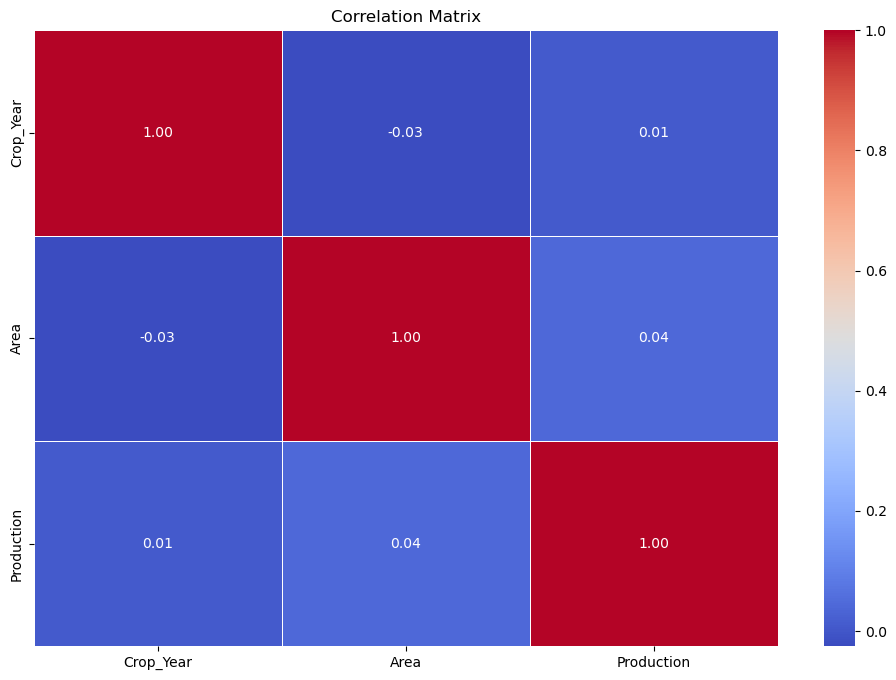

In [12]:
# visualize the correlation matrix

corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Feature Selection and Engineering

In [14]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [15]:
# Creating Dummy variables 

data = pd.get_dummies(data, drop_first=True)

In [18]:
# Ensure no missing values

data.isnull().sum().mean() * 100

0.0

### Outlier Detection and Treatment

In [19]:
# Detecting outliers using Z-score

from scipy import stats
z_scores = np.abs(stats.zscore(data[numeric_features]))
outliers = np.where(z_scores > 3)
print("Number of outliers detected:", len(outliers[0]))

Number of outliers detected: 3833


In [20]:
# Removing outliers

data = data[(z_scores < 3).all(axis=1)]
print("Data shape after outlier removal:", data.shape)

Data shape after outlier removal: (238528, 808)


### Model Building and Evaluation

In [31]:
X = data.drop(columns=[dependent_variable])
y = data[dependent_variable]

In [32]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=1502)

In [34]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [37]:
# Make predictions on the test set

y_pred = model.predict(X_test)

In [39]:
y_pred

array([ 1.0604625e+02,  7.2369256e+05, -1.1273757e+03, ...,
       -1.2604429e+03,  2.3463969e+05,  3.1605574e+03], dtype=float32)

In [43]:
# Evaluate the model

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model,
X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 86.67 %
Standard Deviation: 4.22 %
